In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean_normalization(X:np):
    N = len(X)
    mini = X.min()
    maxi = X.max()
    avg = X.mean()
    X_nomalize = (X - avg) / (maxi - mini)
    
    # Thêm một cột toàn giá trị 1 vào phía trước của X
    X_b = np.c_[np.ones((N, 1)), X_nomalize]
    return X_b

In [17]:
data_house = pd.read_csv('./advertising.csv')
columns = data_house.columns
print(columns)
data_house = data_house.to_numpy()

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [4]:
X_b = mean_normalization(data_house[:, :3])
y = data_house[:,-1]

In [5]:
print(X_b[1])

[ 1.         -0.07575405 -0.09329791 -0.07372976]


### Bài tập 1: linear regression theo phương pháp vectorization :

In [14]:
def predict(x_i, thetas):
    y_hat = np.dot(x_i, thetas)
    return y_hat

def compute_loss(y, y_hat):
    return 0.5 * (y - y_hat)**2

def compute_derivative(x, y_hat, y):
    theta_deri = x * (y_hat - y)  # Không cần nhân 2 nữa
    return theta_deri

def update_thetas(thetas, theta_deri, lr):
    thetas = thetas - lr*(theta_deri)
    return thetas

def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):

    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([1.16270837, -0.81960489, 1.39501033,0.29763545])
    print(thetas)
    losses = []
    N = len(X_b)
    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np.random.randint(N) # In real application, you should use this code
            random_index = i # This code is used for this assignment only

            xi = X_b[random_index]
            yi = y[random_index]

            # Compute output
            y_hat = predict(xi, thetas)

            # Compute loss li   
            loss_li = compute_loss(yi, y_hat)

            # Compute gradient for thetas
            thetas_deri = compute_derivative(xi, y_hat, yi)

            # update theta
            thetas = update_thetas(thetas, thetas_deri, learning_rate)

            # logging
            losses.append(loss_li)

    return thetas, losses

[ 1.16270837 -0.81960489  1.39501033  0.29763545]


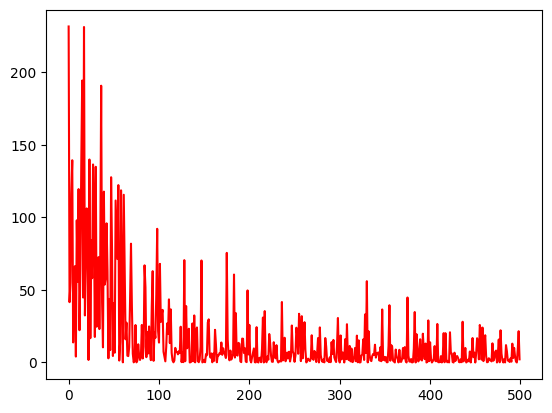

In [15]:
sgd_theta, losses = stochastic_gradient_descent(
    X_b, y, n_epochs=50, learning_rate=0.01)

x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [16]:
sgd_theta, losses = stochastic_gradient_descent (X_b, y, n_epochs= 1, learning_rate= 0.01)
print(np.sum(losses))

[ 1.16270837 -0.81960489  1.39501033  0.29763545]
6754.643359356192


In [18]:
import numpy as np

def predict(x_i, thetas):
    # xi: (N,4) ; thetas:(4,)
    y_hat = np.dot(x_i, thetas)
    # -> (N,)
    return y_hat


def compute_loss(y, y_hat):
    # y_hat : (N,)
    # y : (N,)
    return 0.5 * (y - y_hat)**2


def derivate_loss(y, y_hat):
    # y_hat : (N,)
    # y : (N,)
    return  (y_hat - y)


def derivative_thetas(x: np.ndarray, deriloss: np.ndarray):
    # deriloss shape : (N,)
    # x shape : (N, 4)
    # Reshape deriloss to (N, 1) to match dimensions for matrix multiplication
    N = x.shape[0]
    deriloss = deriloss.reshape(-1, 1)  # Shape (N, 1)
    # Compute gradient: (N, 1) * (N, d) -> (d,)
    theta_deri = np.dot(x.T, deriloss).flatten()  # Shape (d,)
    return theta_deri / N


def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    # Thetas : (4, )
    thetas = np.array([1.16270837,
                         -0.81960489,
                         1.39501033,
                         0.29763545])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        shuffled_indices = shuffled_indices = np.array([21, 144, 17, 107, 37, 115, 167, 31, 3,
                                                            132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16,
                                                            185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126,
                                                            165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190,
                                                            169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131,
                                                            77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139,
                                                            195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147,
                                                            92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47,
                                                            174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67,
                                                            129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24,
                                                            168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55,
                                                            133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122,
                                                            154])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        # Iterate through mini-batches
        for i in range(0, len(X_b), minibatch_size):
            # Get mini-batch
            xi = X_b_shuffled[i:i + minibatch_size]
            yi = y_shuffled[i:i + minibatch_size]

            # Compute output
            y_hat = predict(xi, thetas)
            # Compute loss for the mini-batch
            loss = compute_loss(yi, y_hat)
            # Compute derivative of loss
            deri_loss = derivate_loss(yi, y_hat)
            # Compute derivative of parameters
            gradients = derivative_thetas(xi, deri_loss)
            # Update parameters
            thetas = thetas - (learning_rate * gradients)
            thetas_path.append(thetas)

            # Add the mean loss of the mini-batch
            loss_mean = np.mean(loss)
            print(
                f"Epoch {epoch+1}/{n_epochs}, Mini-batch {i//minibatch_size + 1}, Loss: {loss_mean:.4f}")
            losses.append(loss_mean)

    return thetas_path, losses

Epoch 1/50, Mini-batch 1, Loss: 116.6073
Epoch 1/50, Mini-batch 2, Loss: 99.0867
Epoch 1/50, Mini-batch 3, Loss: 114.8924
Epoch 1/50, Mini-batch 4, Loss: 101.7985
Epoch 1/50, Mini-batch 5, Loss: 125.1877
Epoch 1/50, Mini-batch 6, Loss: 128.2339
Epoch 1/50, Mini-batch 7, Loss: 119.1195
Epoch 1/50, Mini-batch 8, Loss: 87.9050
Epoch 1/50, Mini-batch 9, Loss: 102.8589
Epoch 1/50, Mini-batch 10, Loss: 91.7119
Epoch 2/50, Mini-batch 1, Loss: 94.9554
Epoch 2/50, Mini-batch 2, Loss: 79.8508
Epoch 2/50, Mini-batch 3, Loss: 93.6995
Epoch 2/50, Mini-batch 4, Loss: 82.5233
Epoch 2/50, Mini-batch 5, Loss: 103.5502
Epoch 2/50, Mini-batch 6, Loss: 105.8556
Epoch 2/50, Mini-batch 7, Loss: 98.0347
Epoch 2/50, Mini-batch 8, Loss: 70.8127
Epoch 2/50, Mini-batch 9, Loss: 83.7138
Epoch 2/50, Mini-batch 10, Loss: 75.1493
Epoch 3/50, Mini-batch 1, Loss: 77.6811
Epoch 3/50, Mini-batch 2, Loss: 64.5977
Epoch 3/50, Mini-batch 3, Loss: 76.7246
Epoch 3/50, Mini-batch 4, Loss: 67.2064
Epoch 3/50, Mini-batch 5, Los

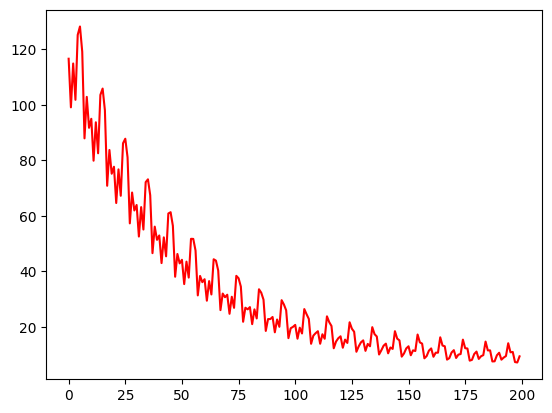

8865.65


In [19]:
data_house = pd.read_csv('./advertising.csv')
data_house = data_house.to_numpy()

X_b = mean_normalization(data_house[:, :3])
y = data_house[:,-1]


mbgd_thetas, losses = mini_batch_gradient_descent(
    X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.show()

print(round(sum(losses), 2))

In [11]:
import numpy as np

def predict(x_i, thetas):
    # xi: (N, 4) ; thetas: (4,)
    y_hat = np.dot(x_i, thetas)  # -> (N,)
    return y_hat

def compute_loss(y, y_hat):
    # y_hat: (N,)
    # y: (N,)
    return (y - y_hat) ** 2  # Trung bình của các bình phương sai số

def derivate_loss(y, y_hat):
    # y_hat: (N,)
    # y: (N,)
    return 2 * (y_hat - y)

def derivative_thetas(x: np.ndarray, deriloss: np.ndarray):
    # deriloss shape: (N,)
    # x shape: (N, 4)
    # Reshape deriloss to (N, 1) to match dimensions for matrix multiplication
    N = x.shape[0]
    deriloss = deriloss.reshape(-1, 1)  # Shape (N, 1)
    # Compute gradient: (N, 1) * (N, d) -> (d,)
    theta_deri = np.dot(x.T, deriloss).flatten()  # Shape (d,)
    return theta_deri / N

def batch_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01):
    # Thetas: (4, )
    thetas = np.array([1.16270837, -0.81960489, 1.39501033, 0.29763545])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # Compute output
        y_hat = predict(X_b, thetas)

        # Compute loss for the mini-batch
        loss = compute_loss(y, y_hat)

        # Compute derivative of loss
        deri_loss = derivate_loss(y, y_hat)

        # Compute derivative of parameters
        gradients = derivative_thetas(X_b, deri_loss)

        # Update parameters
        thetas = thetas - (learning_rate * gradients)
        thetas_path.append(thetas)

        # Add the mean loss of the mini-batch
        loss_mean = np.mean(loss)
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss_mean:.4f}")
        losses.append(loss_mean)

    return thetas_path, losses

Epoch 1/100, Loss: 238.0626
Epoch 2/100, Loss: 228.4166
Epoch 3/100, Loss: 219.1942
Epoch 4/100, Loss: 210.3769
Epoch 5/100, Loss: 201.9467
Epoch 6/100, Loss: 193.8866
Epoch 7/100, Loss: 186.1803
Epoch 8/100, Loss: 178.8122
Epoch 9/100, Loss: 171.7673
Epoch 10/100, Loss: 165.0313
Epoch 11/100, Loss: 158.5908
Epoch 12/100, Loss: 152.4325
Epoch 13/100, Loss: 146.5441
Epoch 14/100, Loss: 140.9137
Epoch 15/100, Loss: 135.5298
Epoch 16/100, Loss: 130.3817
Epoch 17/100, Loss: 125.4589
Epoch 18/100, Loss: 120.7514
Epoch 19/100, Loss: 116.2498
Epoch 20/100, Loss: 111.9451
Epoch 21/100, Loss: 107.8284
Epoch 22/100, Loss: 103.8915
Epoch 23/100, Loss: 100.1266
Epoch 24/100, Loss: 96.5259
Epoch 25/100, Loss: 93.0824
Epoch 26/100, Loss: 89.7889
Epoch 27/100, Loss: 86.6390
Epoch 28/100, Loss: 83.6263
Epoch 29/100, Loss: 80.7447
Epoch 30/100, Loss: 77.9884
Epoch 31/100, Loss: 75.3520
Epoch 32/100, Loss: 72.8302
Epoch 33/100, Loss: 70.4178
Epoch 34/100, Loss: 68.1101
Epoch 35/100, Loss: 65.9025
Epoch 

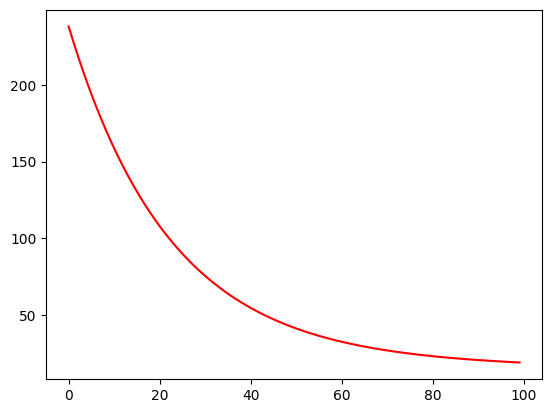

In [12]:
bgd_thetas , losses = batch_gradient_descent (X_b, y, n_epochs =100, learning_rate=0.01)

x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color ="r")
plt.show()

In [13]:
print (round(sum(losses), 2))

6716.46
